

```
## LOAN ELIGIBILITY PREDICTION MACHINE LEARNING MODEL
``

This Machine Learning Loan Eligibility Prediction model is designed to reduce loan defaults by leveraging advanced predictive analytics to assess the creditworthiness of applicants. This solution uses historical data on borrower demographics, income, loan amounts, repayment behavior, and other financial indicators to train predictive models. By identifying patterns and correlations within the data, this model can predict the likelihood of an applicant repaying their loan. This empowers financial institutions to make data-driven decisions, reducing the risk of defaults while ensuring fair access to credit. With features like automated risk scoring and tailored loan recommendations, the system not only enhances efficiency but also contributes to financial inclusivity and stability.

ADDING PACKAGES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from google.colab import drive
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# DATA LOADING

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
directory = "/content/drive/MyDrive/Project"
file_path = '/content/drive/My Drive/iyiyi/loandata.csv'
df = pd.read_csv(file_path,nrows=120000)

<ipython-input-4-996337d7e63f>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path,nrows=120000)


Displaying 5 five rows of the data

In [ ]:
df.head()

,Status,Gender,Age,Dependents,Income,LoanAmount,PropertyValue,LoanPeriod,InterestRate,LoanType
0,0,F,35.0,1,406597.5,2470050.0,3510000.0,12,9.3,Youth
1,0,M,29.0,1,1293502.5,3569850.0,11295000.0,6,9.3,Youth
2,0,F,44.0,0,135000.0,675000.0,1350000.0,6,10.3,Women
3,1,F,45.0,2,312682.5,2968650.0,2970000.0,6,10.3,Women
4,1,M,54.0,3,513000.0,2186550.0,5130000.0,9,9.3,Men


Data discription

In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Status         120000 non-null  object 
 1   Gender         120000 non-null  object 
 2   Age            119974 non-null  float64
 3   Dependents     119974 non-null  object 
 4   Income         120000 non-null  float64
 5   LoanAmount     119993 non-null  float64
 6   PropertyValue  119903 non-null  float64
 7   LoanPeriod     120000 non-null  object 
 8   InterestRate   119185 non-null  float64
 9   LoanType       119185 non-null  object 
dtypes: float64(5), object(5)
memory usage: 9.2+ MB


(120000, 10)

EDA & DATA CLEANING

Distribution of features

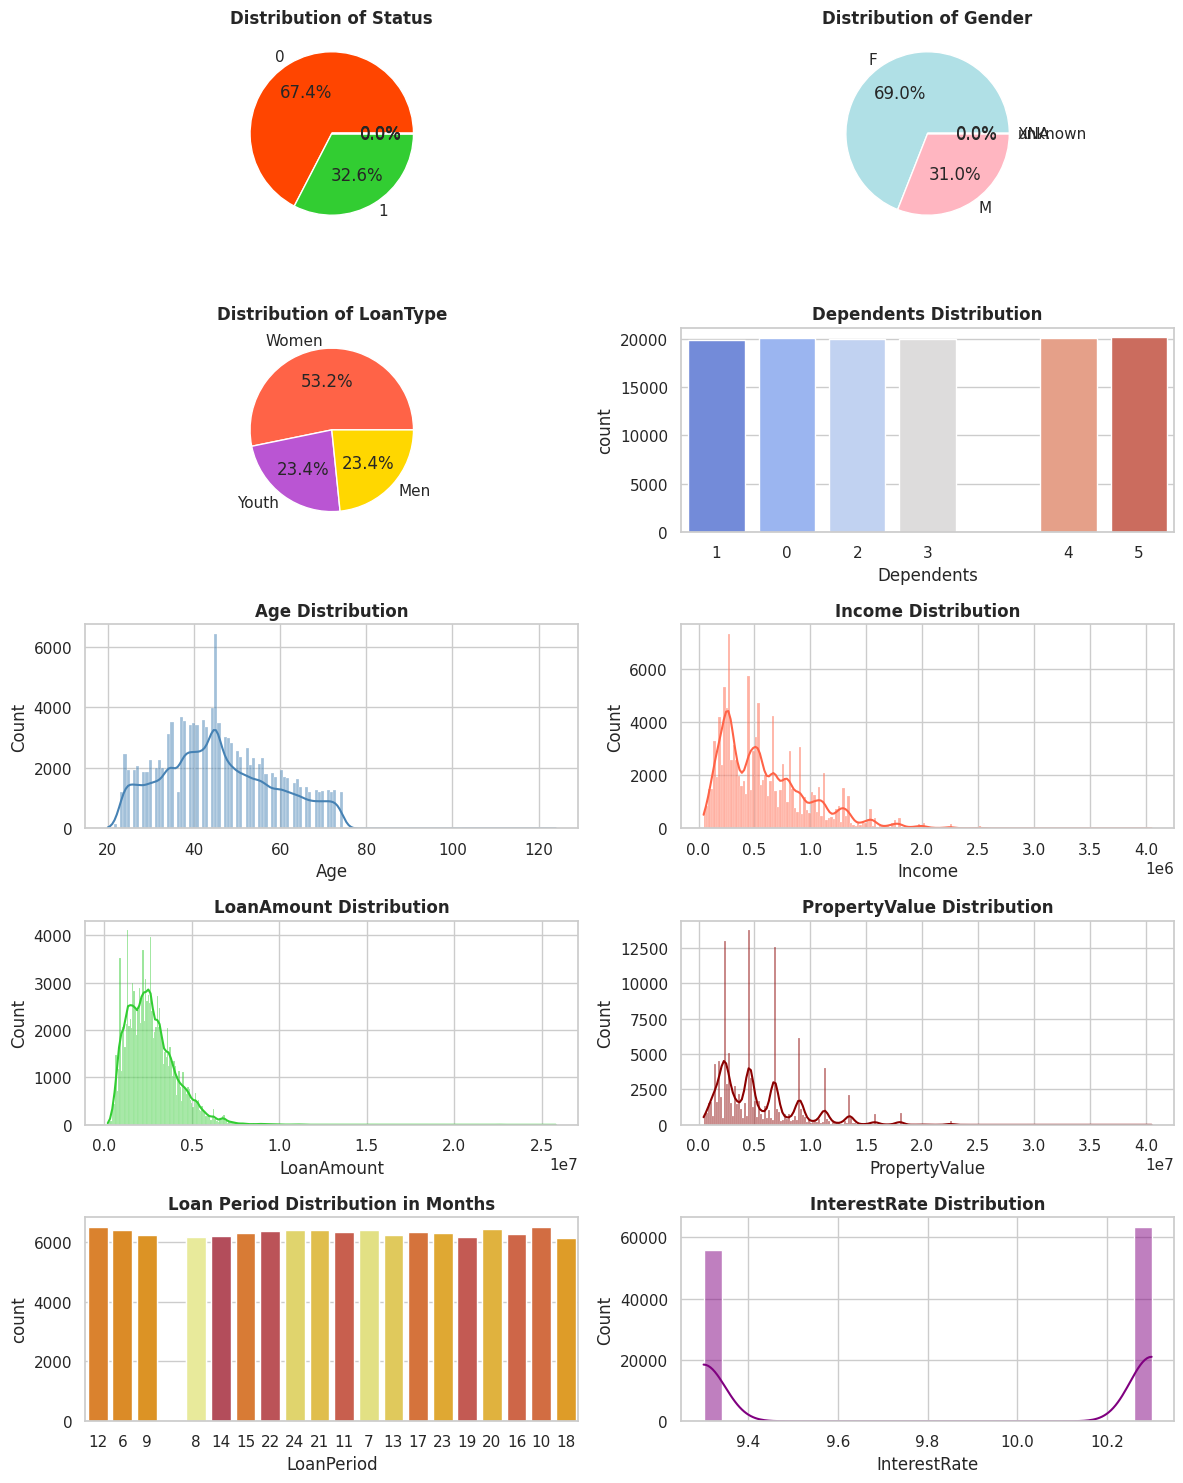

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", palette="muted")

# Customising colour
custom_palette = ['#8B0000', '#800080', '#4682B4', '#FF69B4', '#FFD700', '#32CD32']


# Categorical Features: Status, Gender, LoanType
fig, axes = plt.subplots(5, 2, figsize=(12, 15))

# Pie Chart for Status
status_counts = df['Status'].value_counts()
axes[0, 0].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=['#FF4500', '#32CD32'])
axes[0, 0].set_title('Distribution of Status', fontsize=12, fontweight="bold")
axes[0, 0].set_aspect('equal')

# Pie Chart for Gender
gender_counts = df['Gender'].value_counts()
axes[0, 1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#B0E0E6', '#FFB6C1'])
axes[0, 1].set_title('Distribution of Gender', fontsize=12, fontweight="bold")
axes[0, 1].set_aspect('equal')

# Pie Chart for LoanType
loan_type_counts = df['LoanType'].value_counts()
axes[1, 0].pie(loan_type_counts, labels=loan_type_counts.index, autopct='%1.1f%%', colors=['#FF6347', '#BA55D3', '#FFD700'])
axes[1, 0].set_title('Distribution of LoanType', fontsize=12, fontweight="bold")
axes[1, 0].set_aspect('equal')

# Categorical Feature: Dependents
sns.countplot(x='Dependents', data=df, palette='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Dependents Distribution', fontsize=12, fontweight="bold")

# Numerical Features: Age Distribution
sns.histplot(df['Age'], kde=True, color='#4682B4', ax=axes[2, 0])
axes[2, 0].set_title('Age Distribution', fontsize=12, fontweight="bold")

# Income Distribution
sns.histplot(df['Income'], kde=True, color='#FF6347', ax=axes[2, 1])
axes[2, 1].set_title('Income Distribution', fontsize=12, fontweight="bold")

# LoanAmount Distribution
sns.histplot(df['LoanAmount'], kde=True, color='#32CD32', ax=axes[3, 0])
axes[3, 0].set_title('LoanAmount Distribution', fontsize=12, fontweight="bold")

# PropertyValue (Collateral) Distribution
sns.histplot(df['PropertyValue'], kde=True, color='#8B0000', ax=axes[3, 1])
axes[3, 1].set_title('PropertyValue Distribution', fontsize=12, fontweight="bold")

# LoanPeriod Distribution
sns.countplot(x='LoanPeriod', data=df, palette='inferno', ax=axes[4, 0])
axes[4, 0].set_title('Loan Period Distribution in Months', fontsize=12, fontweight="bold")

# InterestRate Distribution
sns.histplot(df['InterestRate'], kde=True, color='#800080', ax=axes[4, 1])
axes[4, 1].set_title('InterestRate Distribution', fontsize=12, fontweight="bold")

# Adjust layout and show all plots
plt.tight_layout()
plt.show()


Checking data type

In [ ]:
df.dtypes

,0
Status,object
Gender,object
Age,float64
Dependents,object
Income,float64
LoanAmount,float64
PropertyValue,float64
LoanPeriod,object
InterestRate,float64
LoanType,object


Converting data types

In [ ]:
#Converting to float
df['Age']=pd.to_numeric(df['Age'], errors='coerce')
df['LoanAmount']=pd.to_numeric(df['LoanAmount'], errors='coerce')
df['Income']=pd.to_numeric(df['Income'], errors='coerce')
df['PropertyValue']=pd.to_numeric(df['PropertyValue'], errors='coerce')
df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce')

In [ ]:
#Converting to integer
import numpy as np

def convert_to_int(value):
    try:
        numeric_value = pd.to_numeric(value, errors='coerce')
        if pd.isna(numeric_value):
            return np.nan
        return int(numeric_value)
    except (ValueError, TypeError):
        return np.nan


Identifyin non-numeric values in 'Status'

In [ ]:
non_numeric_values = df['Status'][pd.to_numeric(df['Status'], errors='coerce').isna()]
print(non_numeric_values.head())

7         
10        
19        
21        
27310     
Name: Status, dtype: object


In [ ]:
# Select the specific columns and find unique values for each
unique_values = {col: df[col].unique() for col in ['Status', 'Gender', 'Age', 'Income', 'LoanAmount', 'PropertyValue', 'LoanPeriod', 'InterestRate', 'LoanType']}
print(unique_values)


{'Status': array(['0', '1', ' ', '   ', '  '], dtype=object), 'Gender': array(['F', 'M', 'unknown', 'XNA'], dtype=object), 'Age': array([ 35.,  29.,  44.,  45.,  54.,  42.,  39.,  32.,  65.,  46.,  23.,
        68.,  33.,  38.,  57.,  51.,  58.,  24.,  28.,  31.,  70.,  62.,
        48.,  60.,  43.,  56.,  71.,  41.,  73.,  52.,  27.,  37.,  47.,
        40.,  34.,  30.,  55.,  49.,  25.,  64.,  59.,  61.,  53.,  63.,
        26.,  50.,  67.,  74.,  66.,  72.,  69.,  36.,  22.,  21.,  20.,
        nan,  75., 124.,  76.]), 'Income': array([ 406597.5, 1293502.5,  135000. , ...,  645592.5,  428994. ,
        105813. ]), 'LoanAmount': array([2470050., 3569850.,  675000., ..., 5897700.,  771750.,  850950.]), 'PropertyValue': array([ 3510000., 11295000.,  1350000.,  2970000.,  5130000.,  4545000.,
       13950000., 15300000.,  9135000.,  4050000.,  6525000.,   675000.,
        6975000.,  6795000.,  2475000.,  3870000.,  2700000.,  1575000.,
        4275000.,  9270000.,  4500000.,  2250000., 

In [ ]:
df['Status'] = df['Status'].astype(str)
df['Status'] = df['Status'].str.strip()
df['Status'].replace('', np.nan, inplace=True)

Identfying unique values in Status

In [ ]:
unique_values = df['Status'].unique()
print(unique_values)

['0' '1' nan]


Replacing spaces and other non-numeric values with NaN and then filling them with a default value

In [ ]:
df['Status'] = pd.to_numeric(df['Status'], errors='coerce').fillna(0)

Verification

In [ ]:
unique_values = df['Status'].unique()
print(unique_values)

[0. 1.]


In [ ]:
print(df['Gender'].unique())


['F' 'M' 'unknown' 'XNA']


Identifying and removing unique values in Gender

In [ ]:
# Remove rows where Gender is 'unknown', 'XNA', or 'Unspecified'
df = df[~df['Gender'].isin(['unknown', 'XNA'])]

# Checking the unique values in Gender after filtering
print(df['Gender'].unique())



['F' 'M']


Converting Values

In [ ]:
df['LoanPeriod'] = df['LoanPeriod'].apply(convert_to_int)
df['Dependents'] = df['Dependents'].apply(convert_to_int)
df['Age'] =  df['Age'].apply(convert_to_int)
df['Status'] =  df['Status'].apply(convert_to_int)

In [ ]:
df.head()

,Status,Gender,Age,Dependents,Income,LoanAmount,PropertyValue,LoanPeriod,InterestRate,LoanType
0,0,F,35.0,1.0,406597.5,2470050.0,3510000.0,12.0,9.3,Youth
1,0,M,29.0,1.0,1293502.5,3569850.0,11295000.0,6.0,9.3,Youth
2,0,F,44.0,0.0,135000.0,675000.0,1350000.0,6.0,10.3,Women
3,1,F,45.0,2.0,312682.5,2968650.0,2970000.0,6.0,10.3,Women
4,1,M,54.0,3.0,513000.0,2186550.0,5130000.0,9.0,9.3,Men


In [ ]:
df['Dependents']=df['Dependents'].astype('Int64')
df['LoanPeriod']=df['LoanPeriod'].astype('Int64')
df['Status'] = pd.to_numeric(df['Status'])
df['Age'] = pd.to_numeric(df['Age'])

In [ ]:
df.head()

,Status,Gender,Age,Dependents,Income,LoanAmount,PropertyValue,LoanPeriod,InterestRate,LoanType
0,0,F,35.0,1,406597.5,2470050.0,3510000.0,12,9.3,Youth
1,0,M,29.0,1,1293502.5,3569850.0,11295000.0,6,9.3,Youth
2,0,F,44.0,0,135000.0,675000.0,1350000.0,6,10.3,Women
3,1,F,45.0,2,312682.5,2968650.0,2970000.0,6,10.3,Women
4,1,M,54.0,3,513000.0,2186550.0,5130000.0,9,9.3,Men


Verifying data types

In [ ]:
df.dtypes

,0
Status,int64
Gender,object
Age,float64
Dependents,Int64
Income,float64
LoanAmount,float64
PropertyValue,float64
LoanPeriod,Int64
InterestRate,float64
LoanType,object


Handling missing values

In [ ]:
df.isnull().sum()

,0
Status,0
Gender,0
Age,10
Dependents,59
Income,0
LoanAmount,7
PropertyValue,97
LoanPeriod,2
InterestRate,814
LoanType,814


Percentages of missing values

In [ ]:
missing_values = df.isna().sum().iloc[1:]
total_entries = len(df)
values = (missing_values / total_entries) * 100

print(values)

Gender           0.000000
Age              0.008335
Dependents       0.049174
Income           0.000000
LoanAmount       0.005834
PropertyValue    0.080845
LoanPeriod       0.001667
InterestRate     0.678429
LoanType         0.678429
dtype: float64


Dealing with missing values by dropping affected columns

In [ ]:
df = df.dropna(axis=0)
df.isnull().sum()

,0
Status,0
Gender,0
Age,0
Dependents,0
Income,0
LoanAmount,0
PropertyValue,0
LoanPeriod,0
InterestRate,0
LoanType,0


Identifying duplicates & Display the total number of duplicates

In [ ]:
duplicates = df.duplicated()
print(f"Total duplicates: {duplicates.sum()}")

Total duplicates: 1006


Removing duplicates

In [ ]:
df_cleaned = df.drop_duplicates()
print(f"After removing duplicates, total rows: {df_cleaned.shape[0]}")


After removing duplicates, total rows: 117993


I dentifying Outliers Using IQR

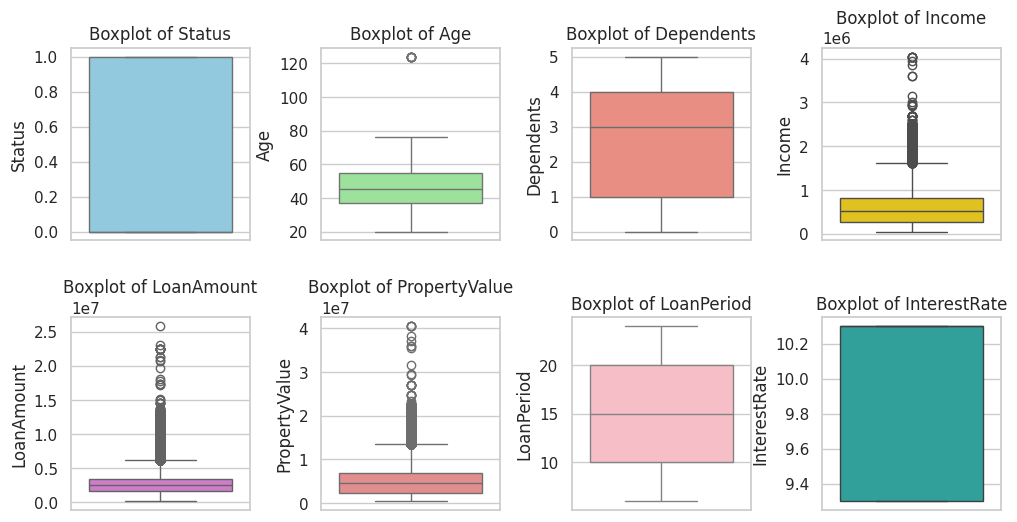

In [ ]:

numerical_columns = df_cleaned.select_dtypes(include='number').columns[:10]

colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'orchid',
          'lightcoral', 'lightpink', 'lightseagreen', 'wheat', 'plum']

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for i, (col, ax) in enumerate(zip(numerical_columns, axes.flat)):
    sns.boxplot(data=df_cleaned, y=col, ax=ax, color=colors[i])
    ax.set_title(f'Boxplot of {col}')

# SavIing and displaying the plot
plt.savefig('boxplots_Outlier.png', dpi=300)
plt.show()



Fill in by mean using IQR method

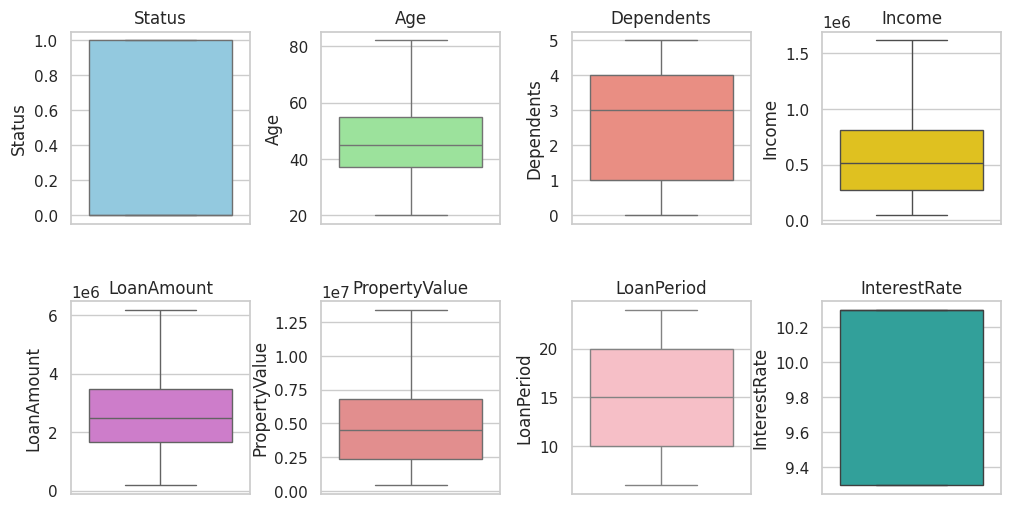

In [ ]:

import matplotlib.pyplot as plt

# Ensure we're working on a copy of the original dataframe if needed
df_cleaned_copy = df_cleaned.copy()

# Defining colours for each box plot
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'orchid',
          'lightcoral', 'lightpink', 'lightseagreen']

# Select numerical columns for plotting
numerical_columns = df_cleaned_copy.select_dtypes(include='number').columns[:8]

# Capping the outliers
for column in numerical_columns:
    # Convert to float to avoid TypeError
    df_cleaned_copy[column] = df_cleaned_copy[column].astype(float)

    Q1, Q3 = df_cleaned_copy[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping the values using .loc[] to avoid SettingWithCopyWarning
    df_cleaned_copy.loc[:, column] = df_cleaned_copy[column].clip(lower=lower_bound, upper=upper_bound)

# Create subplots for box plots after capping
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Looping through the numerical columns and plot box plots
for i, (col, ax) in enumerate(zip(numerical_columns, axes.flat)):
    sns.boxplot(data=df_cleaned_copy, y=col, ax=ax, color=colors[i])
    ax.set_title(f'{col}')
    ax.set_ylabel(col)

# Saving and showing the plot
plt.savefig('Outlier_removal_boxplots_capped.png', dpi=300)
plt.show()


In [ ]:
df_cleaned = df_cleaned_copy

In [ ]:
import pandas as pd

pd.set_option('display.float_format', '{:.2f}'.format)
df_cleaned.describe()


,Status,Age,Dependents,Income,LoanAmount,PropertyValue,LoanPeriod,InterestRate
count,117993.00,117993.00,117993.00,117993.00,117993.00,117993.00,117993.00,117993.00
mean,0.33,45.91,2.50,594108.63,2686079.27,5291288.21,15.00,9.83
std,0.47,12.98,1.71,380683.58,1327127.91,3377635.76,5.49,0.50
min,0.00,20.00,0.00,45000.00,198000.00,450000.00,6.00,9.30
25%,0.00,37.00,1.00,270000.00,1658700.00,2385000.00,10.00,9.30
50%,0.00,45.00,3.00,517500.00,2493900.00,4500000.00,15.00,10.30
75%,1.00,55.00,4.00,808650.00,3469050.00,6795000.00,20.00,10.30
max,1.00,82.00,5.00,1616625.00,6184575.00,13410000.00,24.00,10.30


Distributions after preprocessing

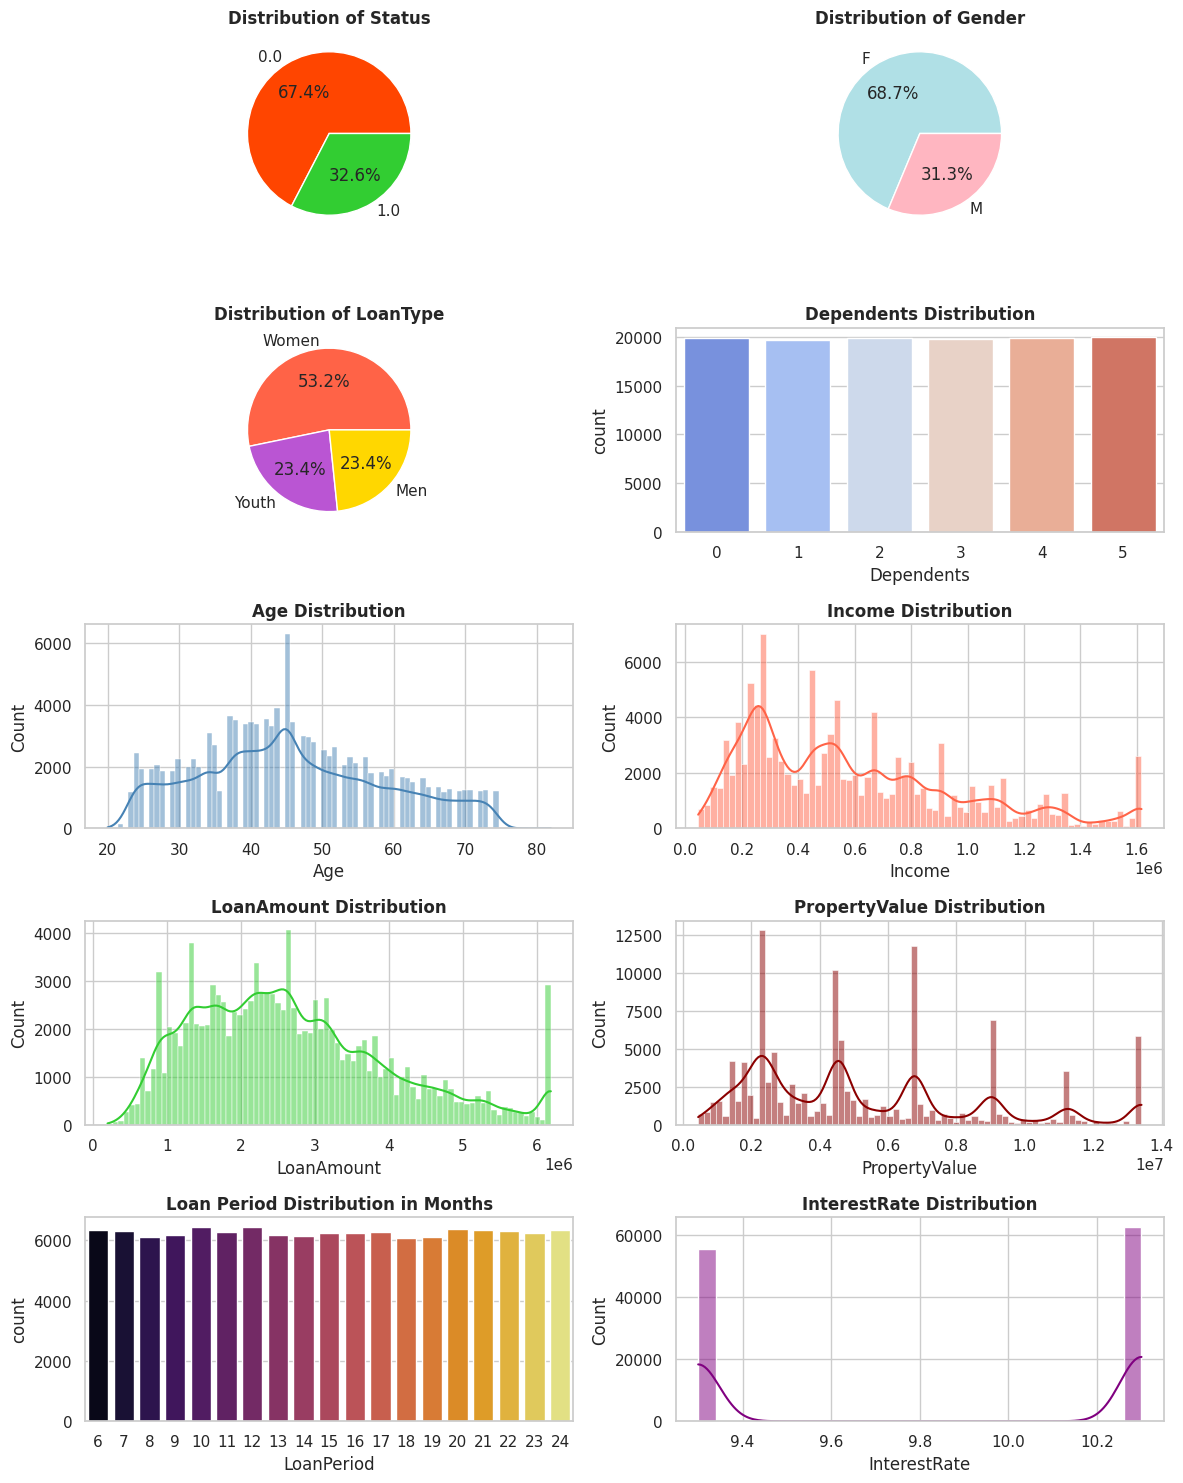

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots to make them more visually appealing
sns.set_theme(style="whitegrid", palette="muted")

# Custom color palette
custom_palette = ['#8B0000', '#800080', '#4682B4', '#FF69B4', '#FFD700', '#32CD32']

# Categorical Features: Status, Gender, LoanType

# Create a 5x2 grid of subplots (5 rows, 2 columns)
fig, axes = plt.subplots(5, 2, figsize=(12, 15))

# Pie Chart for Status
status_counts = df_cleaned['Status'].value_counts()
axes[0, 0].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=['#FF4500', '#32CD32'])
axes[0, 0].set_title('Distribution of Status', fontsize=12, fontweight="bold")
axes[0, 0].set_aspect('equal')

# Pie Chart for Gender
gender_counts = df_cleaned['Gender'].value_counts()
axes[0, 1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#B0E0E6', '#FFB6C1'])
axes[0, 1].set_title('Distribution of Gender', fontsize=12, fontweight="bold")
axes[0, 1].set_aspect('equal')

# Pie Chart for LoanType
loan_type_counts = df['LoanType'].value_counts()
axes[1, 0].pie(loan_type_counts, labels=loan_type_counts.index, autopct='%1.1f%%', colors=['#FF6347', '#BA55D3', '#FFD700'])
axes[1, 0].set_title('Distribution of LoanType', fontsize=12, fontweight="bold")
axes[1, 0].set_aspect('equal')

# Categorical Feature: Dependents
sns.countplot(x='Dependents', data=df, palette='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Dependents Distribution', fontsize=12, fontweight="bold")

# Numerical Features: Age Distribution
sns.histplot(df_cleaned['Age'], kde=True, color='#4682B4', ax=axes[2, 0])
axes[2, 0].set_title('Age Distribution', fontsize=12, fontweight="bold")

# Income Distribution
sns.histplot(df_cleaned['Income'], kde=True, color='#FF6347', ax=axes[2, 1])
axes[2, 1].set_title('Income Distribution', fontsize=12, fontweight="bold")

# LoanAmount Distribution
sns.histplot(df_cleaned['LoanAmount'], kde=True, color='#32CD32', ax=axes[3, 0])
axes[3, 0].set_title('LoanAmount Distribution', fontsize=12, fontweight="bold")

# PropertyValue (Collateral) Distribution
sns.histplot(df_cleaned['PropertyValue'], kde=True, color='#8B0000', ax=axes[3, 1])
axes[3, 1].set_title('PropertyValue Distribution', fontsize=12, fontweight="bold")

# LoanPeriod Distribution
sns.countplot(x='LoanPeriod', data=df, palette='inferno', ax=axes[4, 0])
axes[4, 0].set_title('Loan Period Distribution in Months', fontsize=12, fontweight="bold")

# InterestRate Distribution
sns.histplot(df_cleaned['InterestRate'], kde=True, color='#800080', ax=axes[4, 1])
axes[4, 1].set_title('InterestRate Distribution', fontsize=12, fontweight="bold")

# Adjust layout and show all plots
plt.tight_layout()
plt.show()


FEATURE ENGINEERING

Encoding using one-hot encoding

In [ ]:
import pandas as pd

# Check the column names to confirm the issue
print(df_cleaned.columns)

df_cleaned.columns = df_cleaned.columns.str.strip()
df_cleaned = pd.get_dummies(df_cleaned, columns=['Gender', 'LoanType'], drop_first=False)

Index(['Status', 'Gender', 'Age', 'Dependents', 'Income', 'LoanAmount',
       'PropertyValue', 'LoanPeriod', 'InterestRate', 'LoanType'],
      dtype='object')


In [ ]:
df_cleaned.head()

,Status,Age,Dependents,Income,LoanAmount,PropertyValue,LoanPeriod,InterestRate,Gender_F,Gender_M,LoanType_Men,LoanType_Women,LoanType_Youth
0,0.00,35.00,1.00,406597.50,2470050.00,3510000.00,12.00,9.30,True,False,False,False,True
1,0.00,29.00,1.00,1293502.50,3569850.00,11295000.00,6.00,9.30,False,True,False,False,True
2,0.00,44.00,0.00,135000.00,675000.00,1350000.00,6.00,10.30,True,False,False,True,False
3,1.00,45.00,2.00,312682.50,2968650.00,2970000.00,6.00,10.30,True,False,False,True,False
4,1.00,54.00,3.00,513000.00,2186550.00,5130000.00,9.00,9.30,False,True,True,False,False


Renaming columns

In [ ]:
df_cleaned.rename(columns={
    'Gender_F': 'Female',
    'Gender_M': 'Male',
    'LoanType_Men': 'Men',
    'LoanType_Women': 'Women',
    'LoanType_Youth': 'Youth'
}, inplace=True)

df_cleaned.head()

,Status,Age,Dependents,Income,LoanAmount,PropertyValue,LoanPeriod,InterestRate,Female,Male,Men,Women,Youth
0,0.00,35.00,1.00,406597.50,2470050.00,3510000.00,12.00,9.30,True,False,False,False,True
1,0.00,29.00,1.00,1293502.50,3569850.00,11295000.00,6.00,9.30,False,True,False,False,True
2,0.00,44.00,0.00,135000.00,675000.00,1350000.00,6.00,10.30,True,False,False,True,False
3,1.00,45.00,2.00,312682.50,2968650.00,2970000.00,6.00,10.30,True,False,False,True,False
4,1.00,54.00,3.00,513000.00,2186550.00,5130000.00,9.00,9.30,False,True,True,False,False


Changing encoded columns to numeric

In [ ]:
# Converting specified columns to binary (0 for False, 1 for True)
binary_columns = ['Female', 'Male','Men', 'Women','Youth']

for col in binary_columns:
    df_cleaned[col] = df_cleaned[col].replace({True: 1, False: 0})

# Checking the changes
print(df_cleaned[binary_columns].head())


   Female  Male  Men  Women  Youth
0       1     0    0      0      1
1       0     1    0      0      1
2       1     0    0      1      0
3       1     0    0      1      0
4       0     1    1      0      0


Changing Status column to int

In [ ]:
# Convert the 'Status' column to integer type
df_cleaned['Status'] = df_cleaned['Status'].astype(int)

# Verify the change
print(df_cleaned.dtypes)


Status             int64
Age              float64
Dependents       float64
Income           float64
LoanAmount       float64
PropertyValue    float64
LoanPeriod       float64
InterestRate     float64
Female             int64
Male               int64
Men                int64
Women              int64
Youth              int64
dtype: object


Standadisation using standard scaller

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = ['Income', 'LoanAmount', 'PropertyValue','Age','LoanPeriod','InterestRate']
df_cleaned[columns_to_scale] = scaler.fit_transform(df_cleaned[columns_to_scale])
df_cleaned.head()

,Status,Age,Dependents,Income,LoanAmount,PropertyValue,LoanPeriod,InterestRate,Female,Male,Men,Women,Youth
0,0,-0.84,1.00,-0.49,-0.16,-0.53,-0.55,-1.06,1,0,0,0,1
1,0,-1.30,1.00,1.84,0.67,1.78,-1.64,-1.06,0,1,0,0,1
2,0,-0.15,0.00,-1.21,-1.52,-1.17,-1.64,0.94,1,0,0,1,0
3,1,-0.07,2.00,-0.74,0.21,-0.69,-1.64,0.94,1,0,0,1,0
4,1,0.62,3.00,-0.21,-0.38,-0.05,-1.09,-1.06,0,1,1,0,0


FEAURE IMPORTANCE USING STATISTICAL METHODS

ANOVA Test

In [ ]:

from scipy import stats

df_cleaned = df_cleaned.dropna(subset=['Status'])

numerical_columns = ['Income', 'LoanAmount', 'Dependents', 'Age']

for column in numerical_columns:
    grouped_data = [group[column].values for name, group in df_cleaned.groupby('Status')]

    anova_result = stats.f_oneway(*grouped_data)

    print(f"\nANOVA results for {column}:")
    print('F-statistic:', anova_result.statistic)
    print('p-value:', anova_result.pvalue)

    if anova_result.pvalue < 0.05:
        print(f"There is a significant difference in {column} between the different Status groups.")
    else:
        print(f"There is no significant difference in {column} between the different Status groups.")



ANOVA results for Income:
F-statistic: 12462.712382327742
p-value: 0.0
There is a significant difference in Income between the different Status groups.

ANOVA results for LoanAmount:
F-statistic: 255.98767121027052
p-value: 1.47848131805314e-57
There is a significant difference in LoanAmount between the different Status groups.

ANOVA results for Dependents:
F-statistic: 0.0062161671617852665
p-value: 0.9371578948292234
There is no significant difference in Dependents between the different Status groups.

ANOVA results for Age:
F-statistic: 1.2510033480524865
p-value: 0.26336320684649206
There is no significant difference in Age between the different Status groups.


Coralation using hitmap

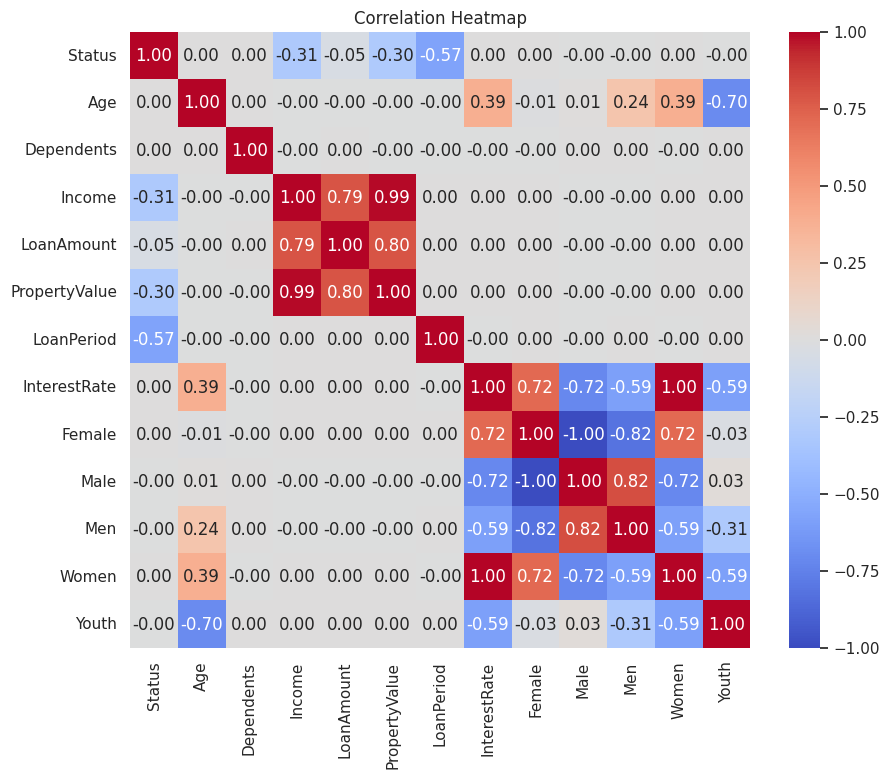

In [ ]:
correlation_matrix = df_cleaned.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

plt.title('Correlation Heatmap')
plt.savefig('Collaration_Matrix.png', dpi=300)  # Save as a high-resolution image

plt.show()

Resampling random undersampler

Balancing Stutus

In [ ]:
!pip install imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.8 MB/s eta 0:00:00


Original Status Distribution:
Status
0    79501
1    38492
Name: count, dtype: int64
Resampled Status Distribution:
Status
0    38492
1    38492
Name: count, dtype: int64


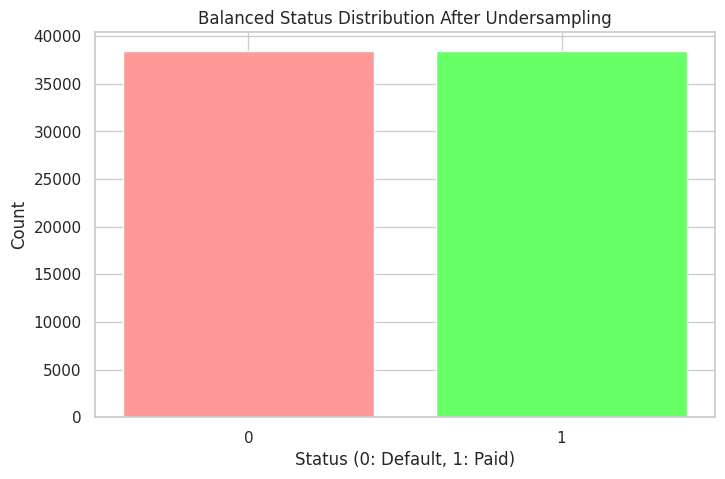

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import matplotlib.pyplot as plt

print("Original Status Distribution:")
print(df_cleaned['Status'].value_counts())

# Preparing the feature set and target variable
X = df_cleaned.drop(columns=['Status'])  # Droping 'Status' from features
y = df_cleaned['Status']

# Undersample the majority class (Status == 0)
undersampler = RandomUnderSampler(sampling_strategy={0: df_cleaned['Status'].value_counts()[1]}, random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Creating a new DataFrame for the resampled data
df_cleaned_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_cleaned_resampled['Status'] = y_resampled

# Checking the distribution of the resampled Status
print("Resampled Status Distribution:")
print(df_cleaned_resampled['Status'].value_counts())

# Plotting the distribution of Status after undersampling
status_counts_resampled = df_cleaned_resampled['Status'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(status_counts_resampled.index.astype(str), status_counts_resampled.values, color=['#ff9999', '#66ff66'])
plt.title('Balanced Status Distribution After Undersampling')
plt.xlabel('Status (0: Default, 1: Paid)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [ ]:
df_cleaned_resampled.shape

(76984, 13)

In [ ]:
df_cleaned_resampled.describe()

,Age,Dependents,Income,LoanAmount,PropertyValue,LoanPeriod,InterestRate,Female,Male,Men,Women,Youth,Status
count,76984.00,76984.00,76984.00,76984.00,76984.00,76984.00,76984.00,76984.00,76984.00,76984.00,76984.00,76984.00,76984.00
mean,-0.00,2.51,-0.12,-0.02,-0.11,-0.21,-0.00,0.69,0.31,0.23,0.53,0.23,0.50
std,1.00,1.71,0.96,1.01,0.97,1.01,1.00,0.46,0.46,0.42,0.50,0.42,0.50
min,-2.00,0.00,-1.44,-1.83,-1.43,-1.64,-1.06,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.69,1.00,-0.89,-0.80,-0.90,-1.09,-1.06,0.00,0.00,0.00,0.00,0.00,0.00
50%,-0.07,3.00,-0.35,-0.17,-0.23,-0.36,0.94,1.00,0.00,0.00,1.00,0.00,0.50
75%,0.70,4.00,0.42,0.56,0.43,0.73,0.94,1.00,1.00,0.00,1.00,0.00,1.00
max,2.78,5.00,2.69,2.64,2.40,1.64,0.94,1.00,1.00,1.00,1.00,1.00,1.00


Model selection and training

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = df_cleaned_resampled.drop('Status', axis=1)
y = df_cleaned_resampled['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)


Training Features Shape: (53888, 12)
Testing Features Shape: (23096, 12)
Training Labels Shape: (53888,)
Testing Labels Shape: (23096,)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer, accuracy_score, f1_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt

Logistic Regression Training Accuracy: 0.8884
Logistic Regression Testing Accuracy: 0.8933
Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89     11548
           1       0.89      0.90      0.89     11548

    accuracy                           0.89     23096
   macro avg       0.89      0.89      0.89     23096
weighted avg       0.89      0.89      0.89     23096



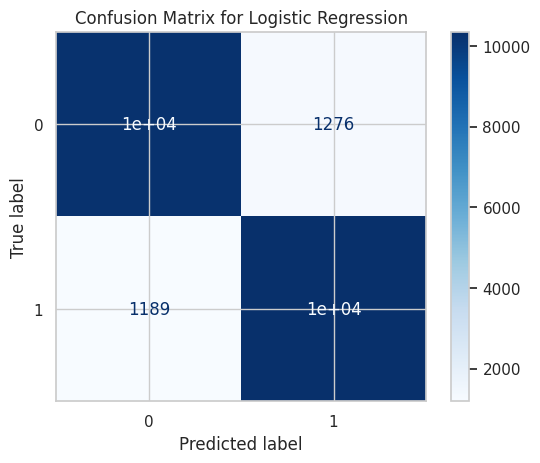

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train the logistic regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Predictions and accuracy on the training set
y_train_pred = logistic_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Logistic Regression Training Accuracy: {train_accuracy:.4f}")

# Predictions and accuracy on the testing set
y_test_pred = logistic_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Logistic Regression Testing Accuracy: {test_accuracy:.4f}")

# Classification report for testing set
print("Classification Report for Testing Set:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix for testing set
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


Random forest

Random Forest Training Accuracy: 1.0000
Random Forest Testing Accuracy: 0.9774
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11548
           1       0.97      0.99      0.98     11548

    accuracy                           0.98     23096
   macro avg       0.98      0.98      0.98     23096
weighted avg       0.98      0.98      0.98     23096



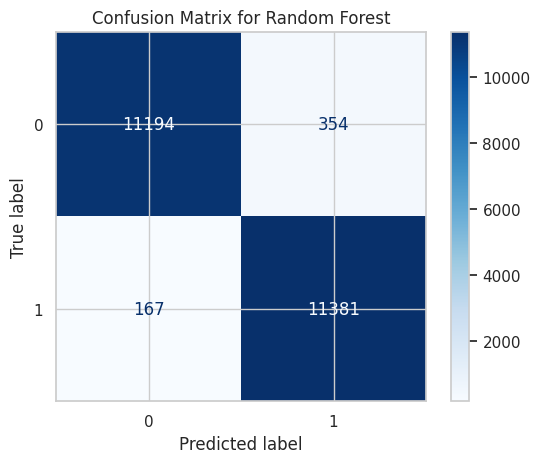

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize and fit the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions on the training and testing sets
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Calculating training and testing accuracies
training_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
testing_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

# Print training and testing accuracies
print(f"Random Forest Training Accuracy: {training_accuracy_rf:.4f}")
print(f"Random Forest Testing Accuracy: {testing_accuracy_rf:.4f}")

# Displaying the classification report for the test set
print(classification_report(y_test, y_test_pred_rf))

# Plotting the confusion matrix for the test set
cm_rf = confusion_matrix(y_test, y_test_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp_rf.plot(cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.show()


Support vector classifier

SVM Training Accuracy: 0.9771
SVM Testing Accuracy: 0.9779
Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     11548
           1       0.96      0.99      0.98     11548

    accuracy                           0.98     23096
   macro avg       0.98      0.98      0.98     23096
weighted avg       0.98      0.98      0.98     23096



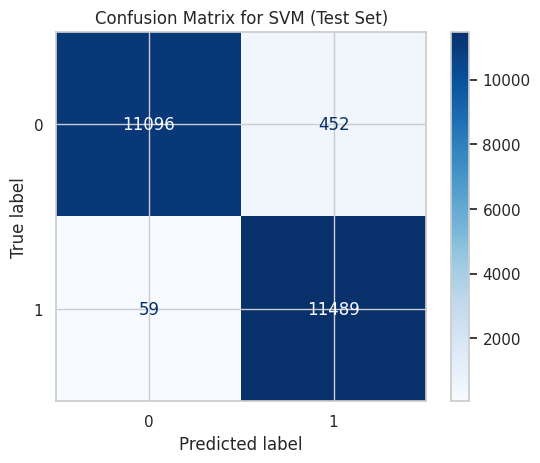

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initializing and train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Training accuracy and predictions
y_train_pred = svm_model.predict(X_train)
accuracy_train_svm = accuracy_score(y_train, y_train_pred)
print(f"SVM Training Accuracy: {accuracy_train_svm:.4f}")

# Testing accuracy and predictions
y_test_pred = svm_model.predict(X_test)
accuracy_test_svm = accuracy_score(y_test, y_test_pred)
print(f"SVM Testing Accuracy: {accuracy_test_svm:.4f}")

# Classification report for the test set
print("Classification Report for Testing Set:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix for the test set
cm_svm = confusion_matrix(y_test, y_test_pred)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_model.classes_)
disp_svm.plot(cmap='Blues')
plt.title('Confusion Matrix for SVM (Test Set)')
plt.show()


Gradient boosting

Gradient Boosting Training Accuracy: 0.9736
Gradient Boosting Testing Accuracy: 0.9709
Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     11548
           1       0.96      0.99      0.97     11548

    accuracy                           0.97     23096
   macro avg       0.97      0.97      0.97     23096
weighted avg       0.97      0.97      0.97     23096



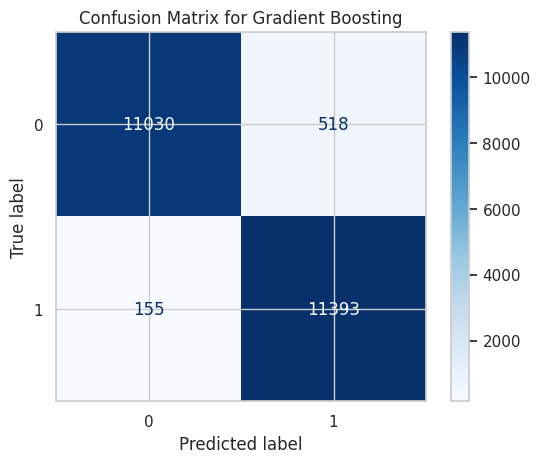

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initializing the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Fitting the model on the training data
gb_model.fit(X_train, y_train)

# Predictions and accuracy for the training set
y_train_pred_gb = gb_model.predict(X_train)
accuracy_train_gb = accuracy_score(y_train, y_train_pred_gb)
print(f"Gradient Boosting Training Accuracy: {accuracy_train_gb:.4f}")

# Predictions and accuracy for the testing set
y_test_pred_gb = gb_model.predict(X_test)
accuracy_test_gb = accuracy_score(y_test, y_test_pred_gb)
print(f"Gradient Boosting Testing Accuracy: {accuracy_test_gb:.4f}")

# Classification report for the testing set
print("Classification Report for Testing Set:")
print(classification_report(y_test, y_test_pred_gb))

# Confusion Matrix for the testing set
cm_gb = confusion_matrix(y_test, y_test_pred_gb)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=gb_model.classes_)
disp_gb.plot(cmap='Blues')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show()


KNN

KNN Training Accuracy: 0.9572
KNN Testing Accuracy: 0.9306
Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     11548
           1       0.92      0.95      0.93     11548

    accuracy                           0.93     23096
   macro avg       0.93      0.93      0.93     23096
weighted avg       0.93      0.93      0.93     23096



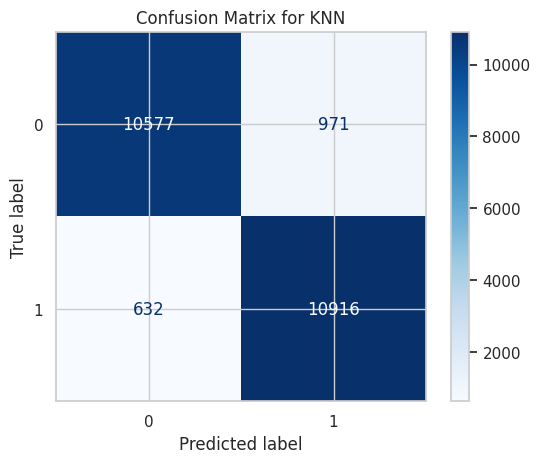

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initializing the KNN model
knn_model = KNeighborsClassifier()

# Fittting the model on the training data
knn_model.fit(X_train, y_train)

# Predictions and accuracy for the training set
y_train_pred_knn = knn_model.predict(X_train)
accuracy_train_knn = accuracy_score(y_train, y_train_pred_knn)
print(f"KNN Training Accuracy: {accuracy_train_knn:.4f}")

# Predictions and accuracy for the testing set
y_test_pred_knn = knn_model.predict(X_test)
accuracy_test_knn = accuracy_score(y_test, y_test_pred_knn)
print(f"KNN Testing Accuracy: {accuracy_test_knn:.4f}")

# Classification report for the testing set
print("Classification Report for Testing Set:")
print(classification_report(y_test, y_test_pred_knn))
cm_knn = confusion_matrix(y_test, y_test_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn_model.classes_)
disp_knn.plot(cmap='Blues')
plt.title('Confusion Matrix for KNN')
plt.show()


Cross validation using 5 Fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Defining the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Defining the evaluation metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Initializing a list to store results
results_list = []

# 5-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for model_name, model in models.items():
    # Compute mean and std for each metric
    accuracy_scores = cross_val_score(model, X, y, cv=kf, scoring=scoring['accuracy'])
    precision_scores = cross_val_score(model, X, y, cv=kf, scoring=scoring['precision'])
    recall_scores = cross_val_score(model, X, y, cv=kf, scoring=scoring['recall'])
    f1_scores = cross_val_score(model, X, y, cv=kf, scoring=scoring['f1'])

    # Append the results for each model to the list
    results_list.append({
        'Model': model_name,
        'Accuracy Mean': accuracy_scores.mean(),
        'Accuracy Std': accuracy_scores.std(),
        'Precision Mean': precision_scores.mean(),
        'Precision Std': precision_scores.std(),
        'Recall Mean': recall_scores.mean(),
        'Recall Std': recall_scores.std(),
        'F1 Score Mean': f1_scores.mean(),
        'F1 Score Std': f1_scores.std()
    })

# Converting the list to a DataFrame
results = pd.DataFrame(results_list)

# Display the table
print(results)


                 Model  Accuracy Mean  Accuracy Std  Precision Mean  \
0  Logistic Regression           0.89          0.00            0.89   
1                  SVM           0.98          0.00            0.98   
2        Random Forest           0.98          0.00            0.98   
3    Gradient Boosting           0.97          0.00            0.97   
4  K-Nearest Neighbors           0.93          0.00            0.93   

   Precision Std  Recall Mean  Recall Std  F1 Score Mean  F1 Score Std  
0           0.00         0.89        0.00           0.89          0.00  
1           0.00         0.98        0.00           0.98          0.00  
2           0.00         0.98        0.00           0.98          0.00  
3           0.00         0.97        0.00           0.97          0.00  
4           0.00         0.93        0.00           0.93          0.00  


In [ ]:
 # Droping the standard deviation columns
results = results.drop(['Accuracy Std', 'Precision Std', 'Recall Std', 'F1 Score Std'], axis=1)

# Display the updated results DataFrame
results


,Model,Accuracy Mean,Precision Mean,Recall Mean,F1 Score Mean
0,Logistic Regression,0.89,0.89,0.89,0.89
1,SVM,0.98,0.98,0.98,0.98
2,Random Forest,0.98,0.98,0.98,0.98
3,Gradient Boosting,0.97,0.97,0.97,0.97
4,K-Nearest Neighbors,0.93,0.93,0.93,0.93


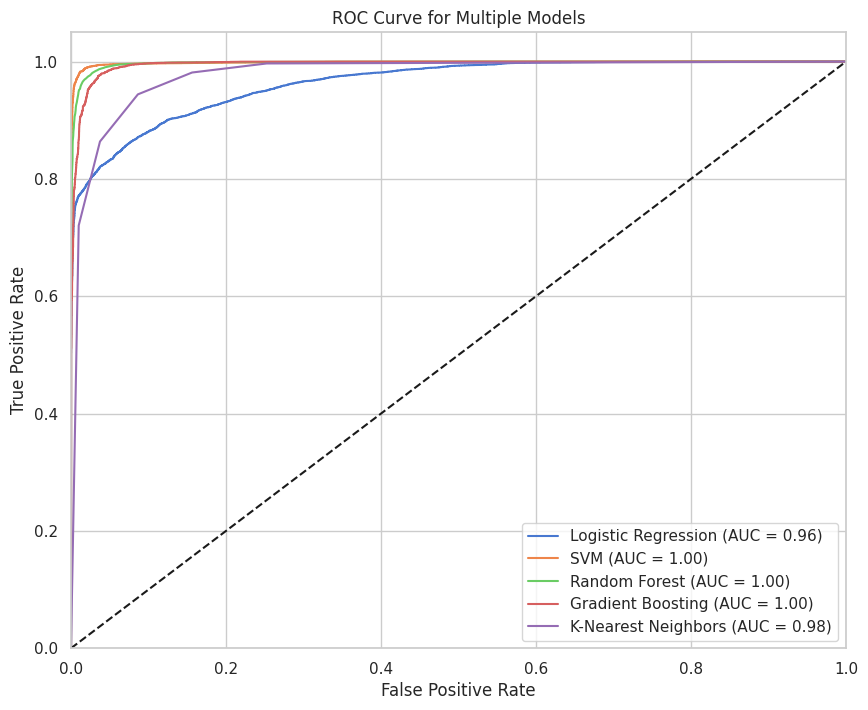

In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Defining the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

plt.figure(figsize=(10, 8))

# Iterating over models and plot ROC curve for each
for model_name, model in models.items():
    model.fit(X_train, y_train)
    # Get the predicted probabilities
    y_proba = model.predict_proba(X_test)[:, 1]
    # Calculate the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Plotting diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiple Models')
plt.legend(loc="lower right")
plt.show()


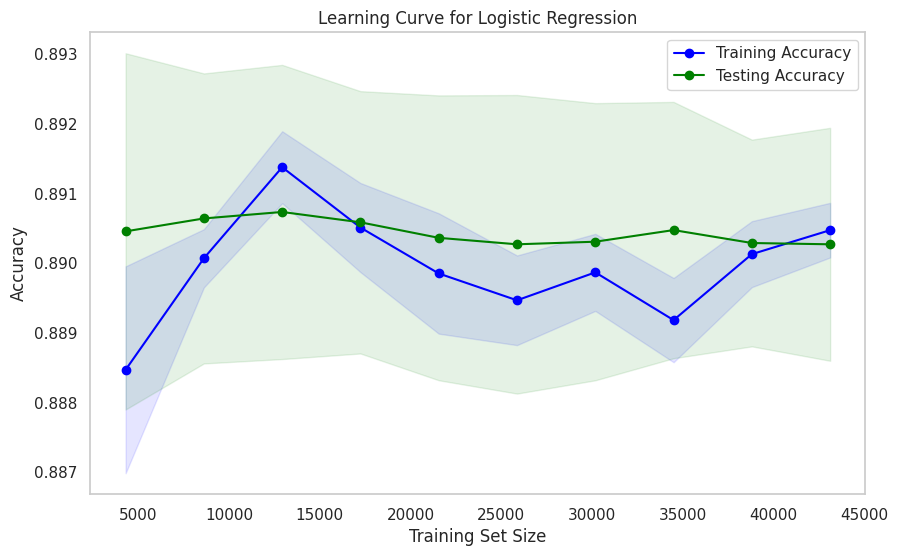

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Defining the logistic regression model
logistic_model = LogisticRegression(random_state=42)

# Set up training sizes (i.e., fractions of the training data)
train_sizes, train_scores, test_scores = learning_curve(
    logistic_model, X_train, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Calculating the mean and standard deviation of training and testing scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Accuracy", color="blue", marker="o")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="blue", alpha=0.1)

plt.plot(train_sizes, test_scores_mean, label="Testing Accuracy", color="green", marker="o")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color="green", alpha=0.1)

# Labels and legend
plt.title("Learning Curve for Logistic Regression")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()

# Save the plot as a PNG file
plt.savefig("learning_curve.png", format="png", dpi=300)
plt.show()


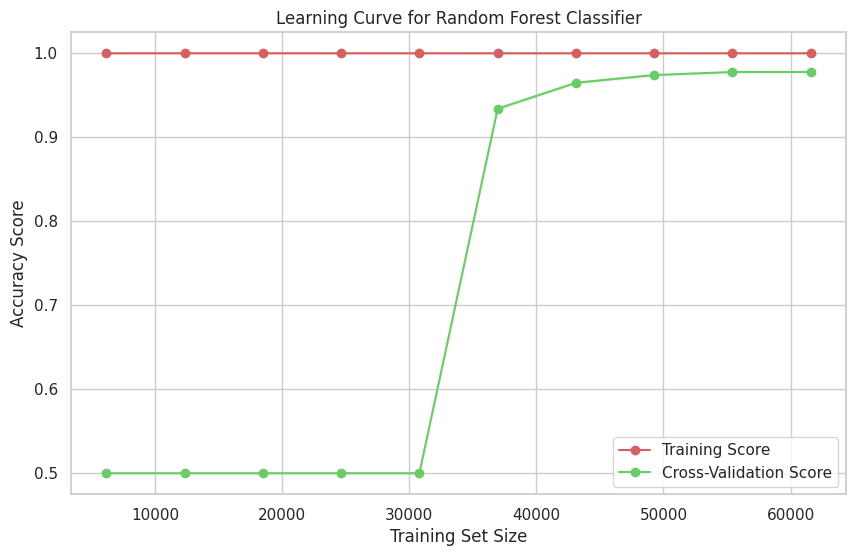

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Setting up the model
rf_model = RandomForestClassifier(random_state=42)

# Generating learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Calculating the mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-Validation Score")

# Filling in the area around the lines for standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

# Adding labels and title
plt.title("Learning Curve for Random Forest Classifier")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")

# Saving plot as PNG
plt.savefig("rf_learning_curve.png", format="png", dpi=300)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 199, in fit
    y = self._validate_targets(y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/

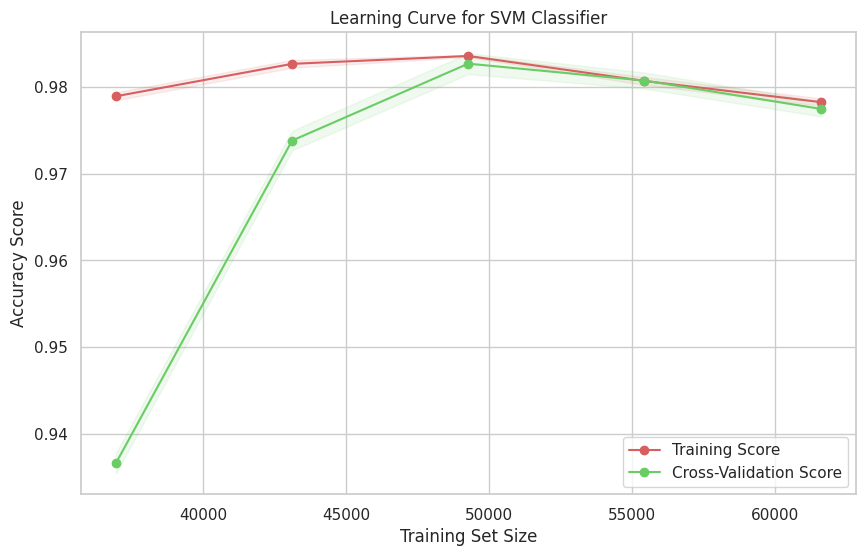

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Initializing the SVM model
svm_model = SVC(random_state=42)

# Generating learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    svm_model, X, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-Validation Score")

# Filling the area around the lines for standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

# Add labels and title
plt.title("Learning Curve for SVM Classifier")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")

# Save plot as PNG
plt.savefig("svm_learning_curve.png", format="png", dpi=300)
plt.show()


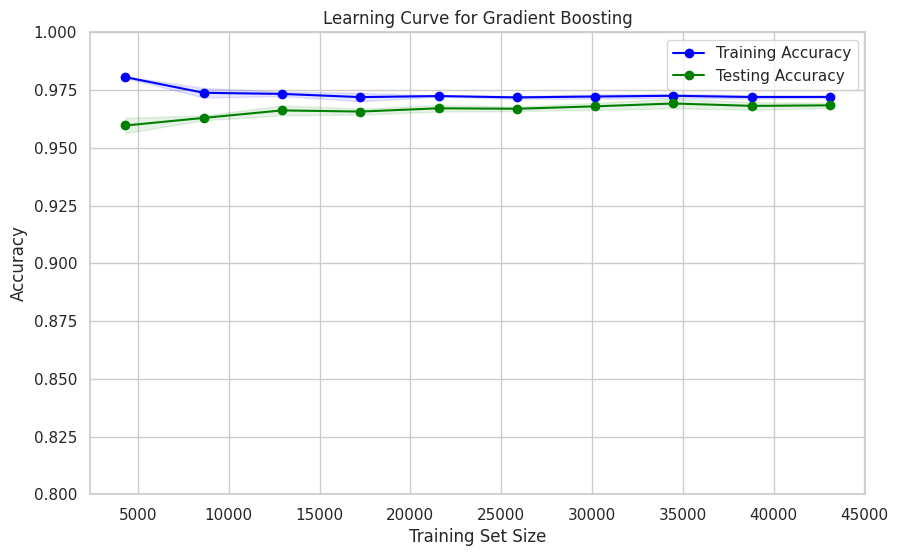

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Initializing the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    gb_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Calculating mean and standard deviation for training and testing scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training Accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="green", label="Testing Accuracy")

# Fill between lines to show standard deviation
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="green")

# Labels and title
plt.title("Learning Curve for Gradient Boosting")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.ylim(0.8, 1.0)  # Adjust y-axis limits if needed to focus on accuracy range
plt.savefig("Learning Curve for Gradient Boosting.png", format="png", dpi=300)
plt.show()


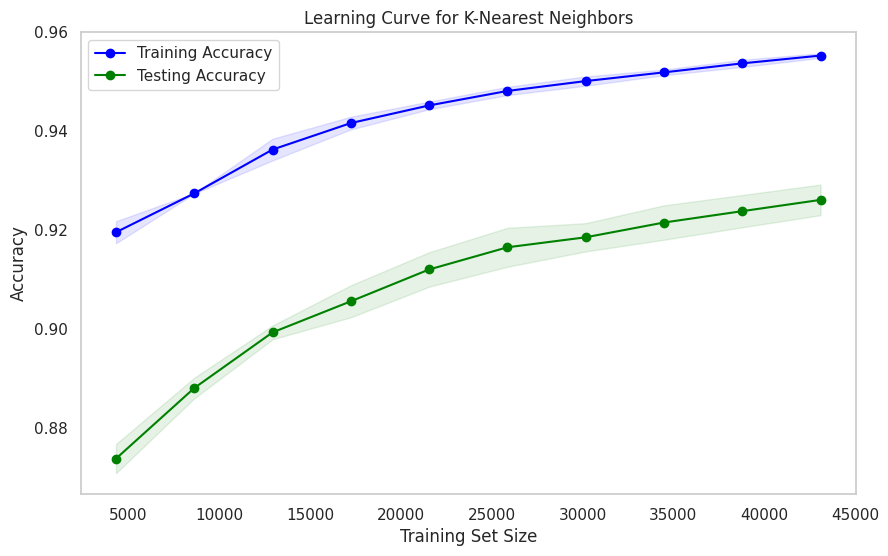

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Defining the KNN model (you can set n_neighbors to any value you want to experiment with)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Set up training sizes (i.e., fractions of the training data)
train_sizes, train_scores, test_scores = learning_curve(
    knn_model, X_train, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Calculating the mean and standard deviation of training and testing scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Accuracy", color="blue", marker="o")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="blue", alpha=0.1)

plt.plot(train_sizes, test_scores_mean, label="Testing Accuracy", color="green", marker="o")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color="green", alpha=0.1)

# Labels and legend
plt.title("Learning Curve for K-Nearest Neighbors")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()

# Save the plot as a PNG file
plt.savefig("knn_learning_curve.png", format="png", dpi=300)
plt.show()


permutation feature importance in svm

After observing that the SVM outperformed all the other models, it is important to check how many features contributed best to the model performance and check if any reduction of the number of feature would further improve the model performance and reduce model complexity. Permutation feature importance has been used. Permutation feature importance is an Ideal because it provides some important advantages for loan prediction using the SVM models. This is a robust and interpretable method for high-stake applications such as loan approvals where transparency becomes important in analyzing how each of the features provides information regarding the model's prediction. The above methodology helps in quantifying the importance of individual features that aid in feature selection optimization, which may improve model performance by reducing overfitting. Furthermore, permutation importance allows for easy insight into the decision-making process of the model, thus boosting trust and accountability in financial decision-making systems


SVM Training Accuracy: 0.9774
SVM Testing Accuracy: 0.9771
Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     11551
           1       0.96      0.99      0.98     11545

    accuracy                           0.98     23096
   macro avg       0.98      0.98      0.98     23096
weighted avg       0.98      0.98      0.98     23096



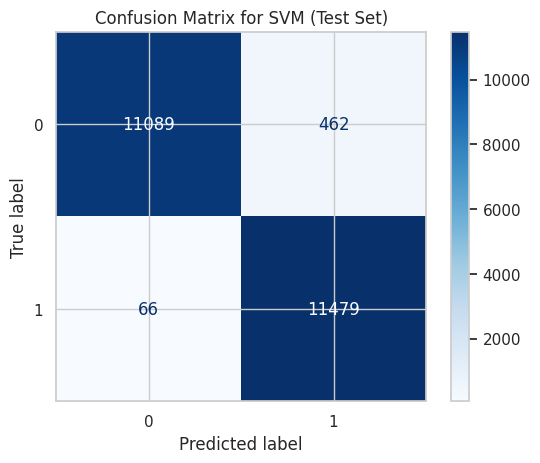


Feature Importance (Permutation):
Dependents: Mean=-0.0003, Std=0.0003
Female: Mean=0.0005, Std=0.0002
Male: Mean=0.0005, Std=0.0002
Youth: Mean=0.0005, Std=0.0001
Women: Mean=0.0006, Std=0.0001
Men: Mean=0.0007, Std=0.0001
Age: Mean=0.0008, Std=0.0002
InterestRate: Mean=0.0017, Std=0.0003
PropertyValue: Mean=0.0914, Std=0.0010
LoanAmount: Mean=0.2516, Std=0.0006
Income: Mean=0.3192, Std=0.0032
LoanPeriod: Mean=0.3299, Std=0.0020


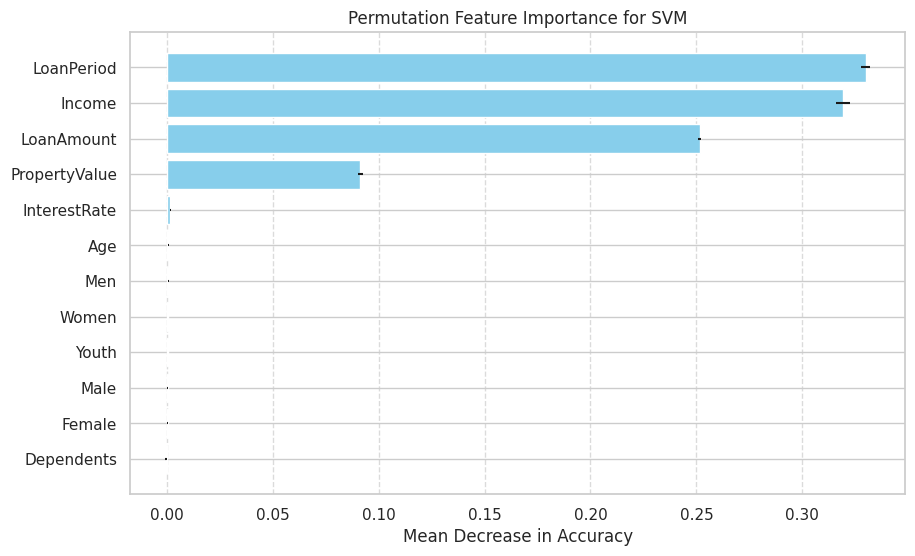

In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np

# Initializing and train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Training accuracy and predictions
y_train_pred = svm_model.predict(X_train)
accuracy_train_svm = accuracy_score(y_train, y_train_pred)
print(f"SVM Training Accuracy: {accuracy_train_svm:.4f}")

# Testing accuracy and predictions
y_test_pred = svm_model.predict(X_test)
accuracy_test_svm = accuracy_score(y_test, y_test_pred)
print(f"SVM Testing Accuracy: {accuracy_test_svm:.4f}")

# Classification report for the test set
print("Classification Report for Testing Set:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix for the test set
cm_svm = confusion_matrix(y_test, y_test_pred)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_model.classes_)
disp_svm.plot(cmap='Blues')
plt.title('Confusion Matrix for SVM (Test Set)')
plt.show()

# Calculating Permutation Feature Importance
perm_importance = permutation_importance(svm_model, X_test, y_test, scoring='accuracy', random_state=42)

# Displaying feature importance
feature_names = X_train.columns  # Assuming X_train is a DataFrame
sorted_idx = perm_importance.importances_mean.argsort()

print("\nFeature Importance (Permutation):")
for i in sorted_idx:
    print(f"{feature_names[i]}: Mean={perm_importance.importances_mean[i]:.4f}, Std={perm_importance.importances_std[i]:.4f}")

# Visualizing feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx], xerr=perm_importance.importances_std[sorted_idx], color="skyblue")
plt.xlabel("Mean Decrease in Accuracy")
plt.title("Permutation Feature Importance for SVM")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


In [ ]:
# Dropping the specified columns, including 'Dependents'
columns_to_drop = ['Men', 'Youth', 'Women', 'InterestRate', 'Dependents']
df_cleaned_resampled = df_cleaned_resampled.drop(columns=columns_to_drop)

# Display the updated DataFrame
print("Updated DataFrame after dropping specified columns:")
print(df_cleaned_resampled.head())


Updated DataFrame after dropping specified columns:
         Age  Income  LoanAmount  PropertyValue  LoanPeriod  Female  Male  \
78301   1.39   -0.25        0.96          -0.19        0.91       0     1   
8482    0.01    1.29        1.45           1.19        0.91       1     0   
116220 -1.53   -0.03        0.10          -0.19        0.55       0     1   
113656  1.78    1.27        0.86           1.10        1.46       0     1   
18124   0.85    0.21       -0.20           0.43       -0.73       0     1   

        Status  
78301        0  
8482         0  
116220       0  
113656       0  
18124        0  


In [ ]:
X = df_cleaned_resampled.drop('Status', axis=1)
y = df_cleaned_resampled['Status']


SVM Training Accuracy: 0.9774
SVM Testing Accuracy: 0.9771
Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     11551
           1       0.96      0.99      0.98     11545

    accuracy                           0.98     23096
   macro avg       0.98      0.98      0.98     23096
weighted avg       0.98      0.98      0.98     23096



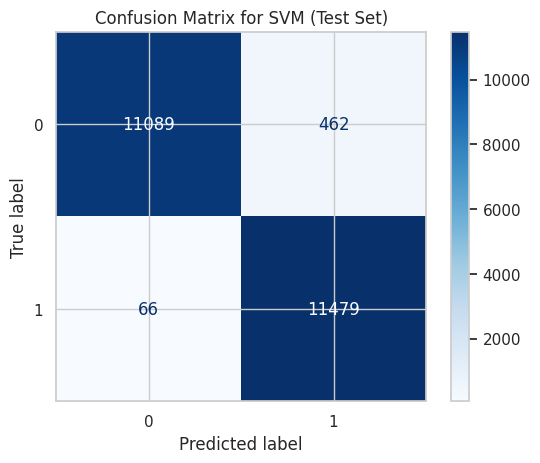

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initializing and train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Training accuracy and predictions
y_train_pred = svm_model.predict(X_train)
accuracy_train_svm = accuracy_score(y_train, y_train_pred)
print(f"SVM Training Accuracy: {accuracy_train_svm:.4f}")

# Testing accuracy and predictions
y_test_pred = svm_model.predict(X_test)
accuracy_test_svm = accuracy_score(y_test, y_test_pred)
print(f"SVM Testing Accuracy: {accuracy_test_svm:.4f}")

# Classification report for the test set
print("Classification Report for Testing Set:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix for the test set
cm_svm = confusion_matrix(y_test, y_test_pred)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_model.classes_)
disp_svm.plot(cmap='Blues')
plt.title('Confusion Matrix for SVM (Test Set)')
plt.show()
